### Importing libraries

In [333]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_squared_error

### Adding Data

In [334]:
df=pd.read_csv('train.csv')

In [335]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [336]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Cleaning Data

In [337]:
df.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [338]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

### Filling Null Value with mean

In [339]:
df['Age'].fillna(value=df['Age'].mean(),inplace=True)

### Replaced Categorical Data with Numerical Data

In [340]:
df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})

### Data Visualization

<Axes: >

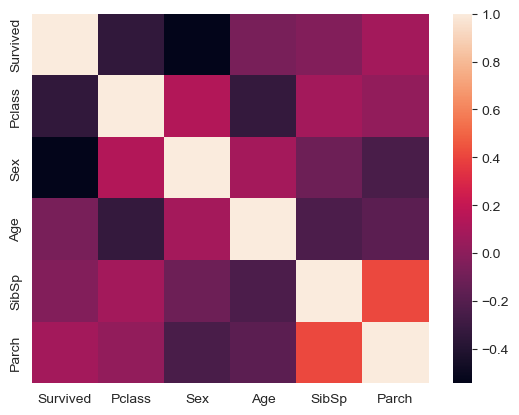

In [341]:
sns.heatmap(df.corr())

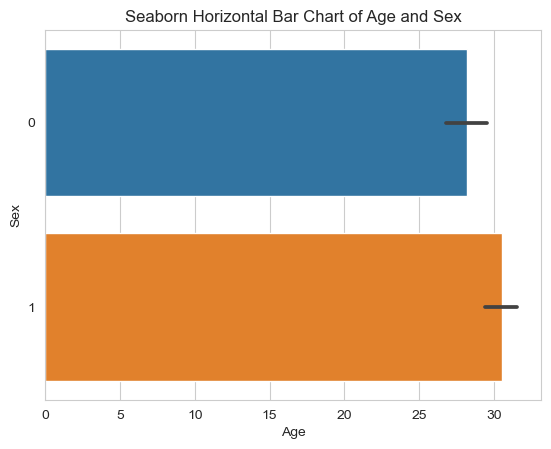

In [342]:
sns.barplot(x='Age', y='Sex', data=df, orient='h')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.title('Seaborn Horizontal Bar Chart of Age and Sex')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

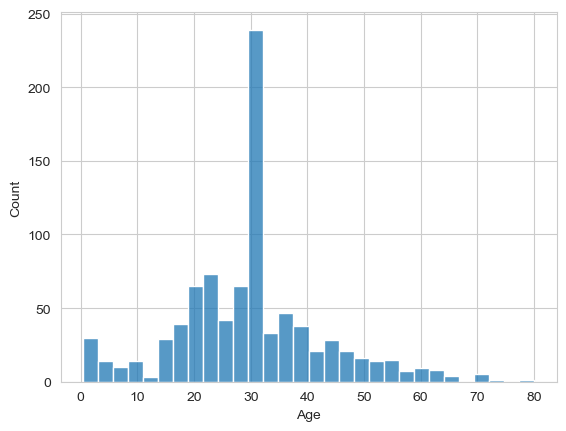

In [343]:
sns.histplot(df['Age'])


<Axes: xlabel='count', ylabel='Survived'>

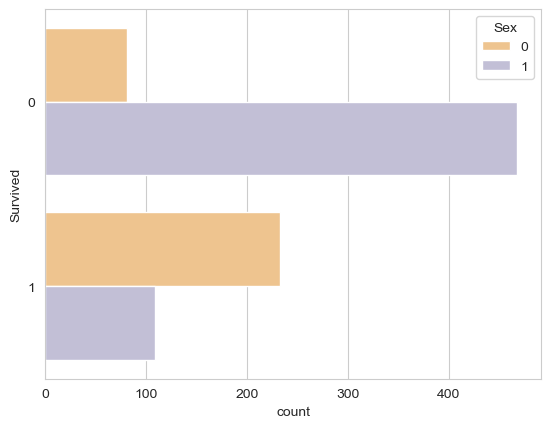

In [344]:
sns.set_style('whitegrid')
sns.countplot(hue="Sex",y='Survived',data=df,palette='PuOr')


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


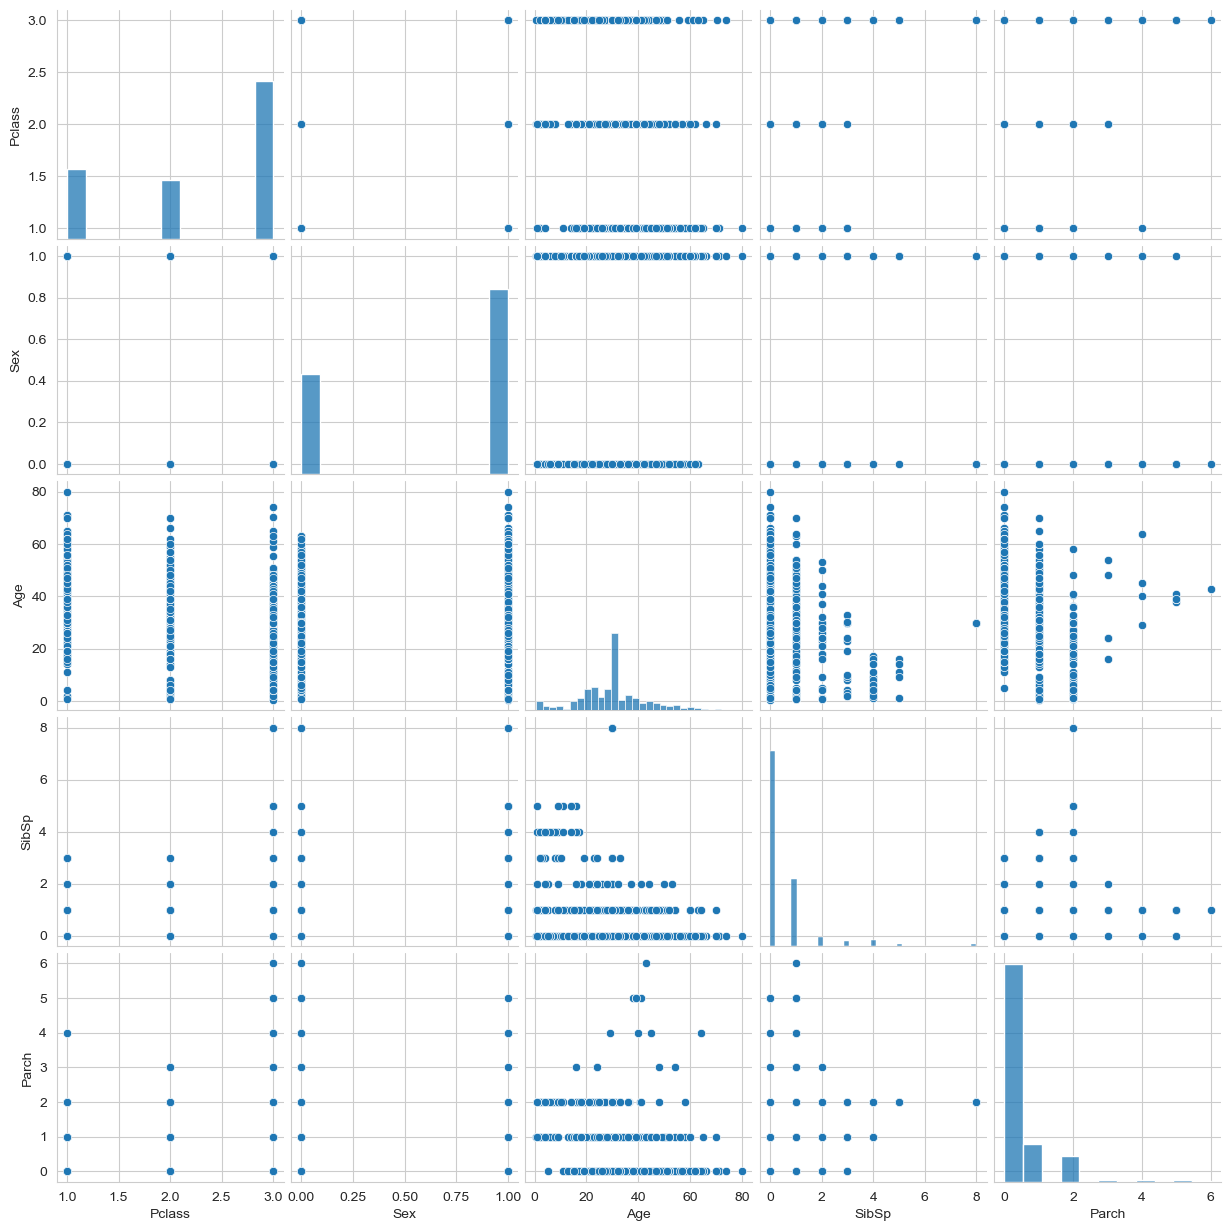

In [345]:
sns.pairplot(x)

In [346]:
x=df.drop(['Survived'],axis=1)

In [347]:
x

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.000000,1,0
1,1,0,38.000000,1,0
2,3,0,26.000000,0,0
3,1,0,35.000000,1,0
4,3,1,35.000000,0,0
...,...,...,...,...,...
886,2,1,27.000000,0,0
887,1,0,19.000000,0,0
888,3,0,29.699118,1,2
889,1,1,26.000000,0,0


In [348]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0
887,1,1,0,19.000000,0,0
888,0,3,0,29.699118,1,2
889,1,1,1,26.000000,0,0


In [349]:
y=df['Survived']

<Axes: xlabel='Survived', ylabel='Pclass'>

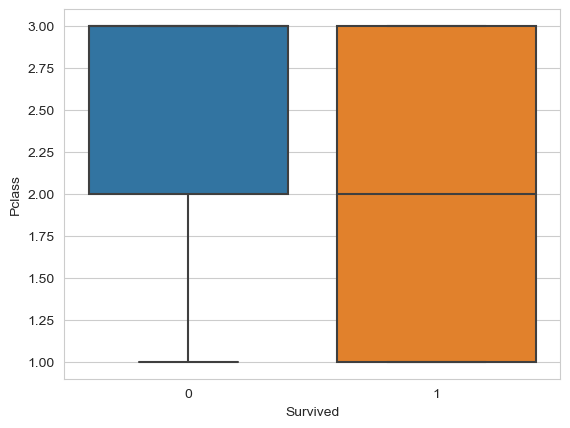

In [350]:
sns.boxplot(x='Survived',y="Pclass", data=df)

### Creating a Predictive Model

In [351]:
x_train,x_test,y_train,y_test=train_test_split (x,y, test_size=0.3, random_state=123,stratify=y)

In [352]:
reg=LogisticRegression()

In [353]:
reg.fit(x_train,y_train)

LogisticRegression()

In [354]:
reg.intercept_

array([4.99613234])

In [355]:
reg.coef_

array([[-1.06896214, -2.69730418, -0.04287651, -0.29520168, -0.00274931]])

In [356]:
y_pred=reg.predict(x_test)

In [357]:
rmse=mean_squared_error(y_test,y_pred)

In [358]:
rmse

0.20149253731343283

In [359]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       165
           1       0.77      0.68      0.72       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

